In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/train.csv')
test = pd.read_csv('/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/test.csv')

In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [6]:
set(train.columns) - set(test.columns)

{'casual', 'count', 'registered'}

In [7]:
df = pd.concat([train,test]).reset_index(drop=True)

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df['dayofweek'] = df['datetime'].dt.dayofweek
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,0,0,5


## EDA

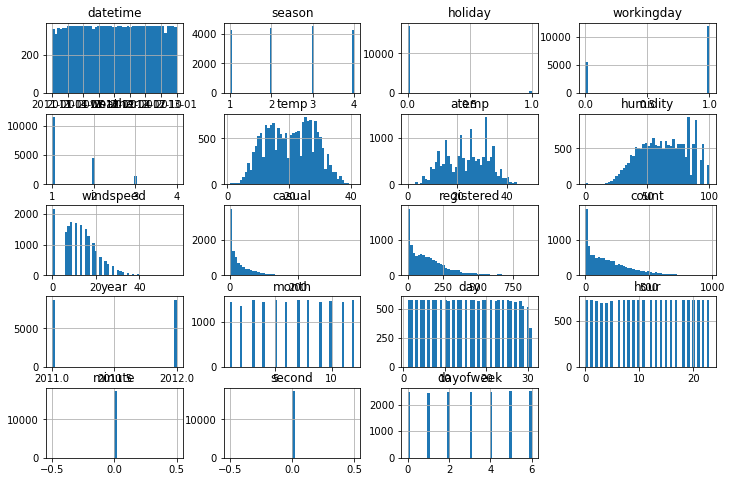

In [9]:
_ = df.hist(figsize=(12,8), bins=50)

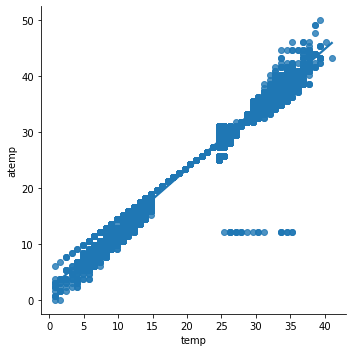

In [10]:
sns.lmplot(data=df, x='temp', y='atemp')

<AxesSubplot:xlabel='year', ylabel='count'>

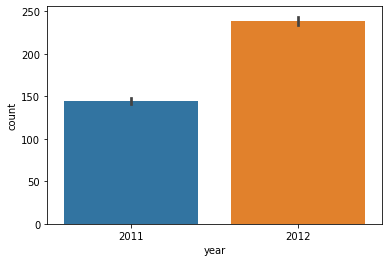

In [11]:
sns.barplot(data=df, x='year', y='count')

<AxesSubplot:xlabel='month', ylabel='count'>

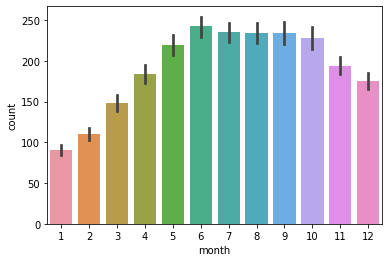

In [12]:
sns.barplot(data=df, x='month', y='count')

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

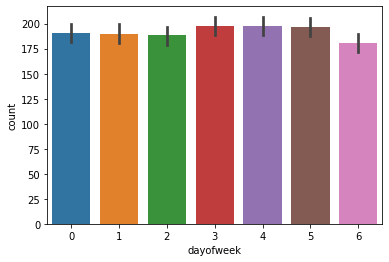

In [13]:
sns.barplot(data=df, x='dayofweek', y='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

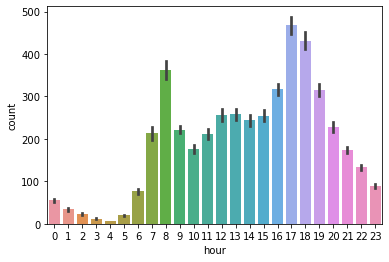

In [14]:
sns.barplot(data=df, x='hour', y='count')

<AxesSubplot:xlabel='hour'>

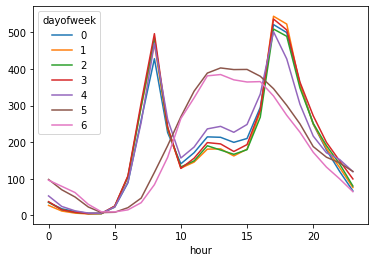

In [15]:
pd.pivot_table(df, index='hour', columns='dayofweek', values='count').plot()
# sns.pointplot(data=df, x='hour', y='count', hue='dayofweek', ci=None)

<AxesSubplot:xlabel='month', ylabel='count'>

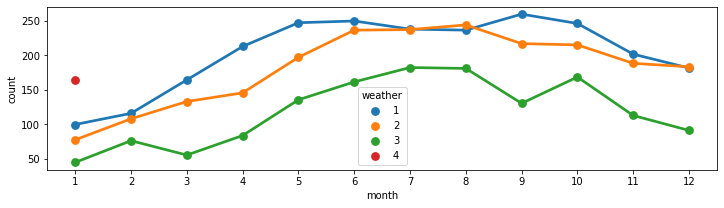

In [16]:
plt.figure(figsize=(12,3))
sns.pointplot(data=df, x='month', y='count', hue='weather', ci=None)

<AxesSubplot:xlabel='hour', ylabel='count'>

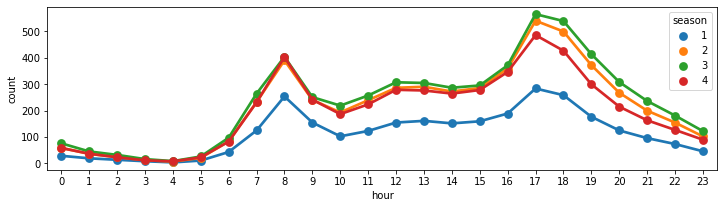

In [17]:
plt.figure(figsize=(12,3))

sns.pointplot(data=df, x='hour', y='count', hue='season', ci=None)

In [18]:
temp_feat = df.columns.to_list()
temp_feat.remove('datetime')
temp_feat.remove('count')
temp_feat.remove('casual')
temp_feat.remove('registered')
temp_feat.remove('atemp')

feature_names = temp_feat
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dayofweek']

In [19]:
df[feature_names].isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
minute        0
second        0
dayofweek     0
dtype: int64

In [20]:
label_name = 'count'

In [21]:
X_train = df.loc[df['count'].notnull(), feature_names]
X_train.shape
# X_train = df.iloc[train.index][feature_names]

(10886, 14)

In [22]:
X_test = df.loc[df['count'].isnull(), feature_names]
X_test.shape
# X_train = df.iloc[test.index][feature_names]

(6493, 14)

In [23]:
y_train = df.loc[df['count'].notnull(), label_name]
y_train.shape
# X_train = df.iloc[train.index][label_names]

(10886,)

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

cross_validate(model, X_train, y_train, cv=5, n_jobs=-1, scoring="r2")
y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)
y_valid_predict[:10]

array([ 66.81,  59.94,  45.81,  20.32,   7.12,   6.16,   9.89,  37.66,
        97.39, 153.75])

In [26]:
mae = np.abs(y_train-y_valid_predict).mean()

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train,y_valid_predict)

49.033707514238465

In [28]:
# mean_squared_error
mse = np.square(y_train-y_valid_predict).mean()
mse

5576.326497078842

In [29]:
np.sqrt(mse)

74.67480496846873

In [30]:
np.sqrt(np.square(np.log(y_train+1) - np.log(y_valid_predict + 1)).mean())

0.5083167774708937

In [31]:
from sklearn.metrics import mean_squared_log_error

rmsle = mean_squared_log_error(y_train, y_valid_predict)**0.5

In [32]:
y_predict = model.fit(X_train, y_train).predict(X_test)

<AxesSubplot:>

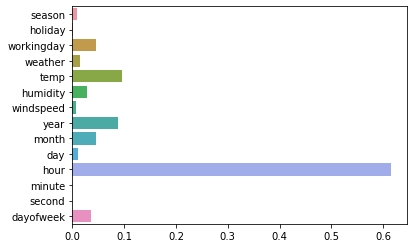

In [33]:
sns.barplot(x=model.feature_importances_,y=X_train.columns)

In [34]:
ans = pd.read_csv('/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/sampleSubmission.csv')

In [35]:
ans['count'] = y_predict

In [36]:
ans.to_csv(f'MySubmission{rmsle:.2f}.csv',index=False)

In [37]:
ans.to_csv('/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/MySubmission.csv',index=False)